In [43]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [44]:
df.dropna(inplace=True)

In [45]:
X = df.drop('label', axis=1)

In [46]:
## Get the Dependent features
y=df['label']

### Genism Representation

#### import necessary libraries


In [47]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from gensim.models import Word2Vec
import numpy as np


#### add configurations

In [48]:
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [49]:
# Text Preprocessing function
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    return words

#### do data preprocessing

In [50]:
# Apply preprocessing
X['processed_text'] = X['text'].apply(preprocess_text)

In [51]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [52]:
word2vec_model = Word2Vec(sentences=X['processed_text'], vector_size=100, window=5, min_count=1, workers=4)


In [53]:

# Function to get the average Word2Vec embedding for a sentence
def get_average_word2vec(text, model, vector_size):
    vec = np.zeros(vector_size)
    count = 0
    for word in text:
        if word in model.wv.key_to_index:
            vec += model.wv[word]
            count += 1
    if count != 0:
        vec /= count
    return vec

# Generate embeddings for each text
vector_size = word2vec_model.vector_size
X['embedding'] = X['processed_text'].apply(lambda x: get_average_word2vec(x, word2vec_model, vector_size))

In [54]:
X.head()

,id,title,author,text,processed_text,embedding
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,"[house, dem, aide, even, see, comey, letter, j...","[-0.9247934305812723, 0.3962123564902752, -0.6..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,"[ever, get, feeling, life, circles, roundabout...","[-0.6248589039166317, 0.7229946595842058, -0.6..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...","[truth, might, get, fired, october, 29, 2016, ...","[-0.5285036171877587, 0.5662500925771146, -0.7..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,"[videos, 15, civilians, killed, single, us, ai...","[-0.597613066766534, 0.5606952261422401, -0.35..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,"[print, iranian, woman, sentenced, six, years,...","[-0.48861148398306764, 0.3843924521018615, -0...."


In [55]:
X['embedding'].shape

(18285,)

#### prepare Data for trainning

In [76]:
X_final = np.array(X['embedding'].tolist())  # Convert DataFrame to NumPy array with shape (num_samples, embedding_dim)
y_final = np.array(y)

# Reshape X_final to add the 'timesteps' dimension, making it 3D
X_final = X_final.reshape((X_final.shape[0], 1, X_final.shape[1]))  # Shape: (num_samples, timesteps=1, embedding_dim)





In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.3, random_state=42)

### make a LSTM model


In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [74]:


# Define the model
model = Sequential()

# LSTM layer with 100 units
model.add(LSTM(100, input_shape=(None, 100)))

# Output layer with a single neuron and sigmoid activation (for binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Printing the model summary
print(model.summary())


c:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,501 (314.46 KB)

 Trainable params: 80,501 (314.46 KB)

 Non-trainable params: 0 (0.00 B)

None


Training 01

In [78]:
### Finally Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=64)

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7714 - loss: 0.4784 - val_accuracy: 0.8921 - val_loss: 0.2789
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8869 - loss: 0.2700 - val_accuracy: 0.9041 - val_loss: 0.2477
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8969 - loss: 0.2509 - val_accuracy: 0.9027 - val_loss: 0.2432
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9063 - loss: 0.2367 - val_accuracy: 0.9028 - val_loss: 0.2397
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9046 - loss: 0.2340 - val_accuracy: 0.9025 - val_loss: 0.2445
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9104 - loss: 0.2197 - val_accuracy: 0.9123 - val_loss: 0.2217
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9168 - loss: 0.2169 - val_accuracy: 0.9174 - val_loss: 0.2132
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9135 - loss: 0.2135 - val_accuracy: 0.

In [81]:
# make function to predict and calculate accuracy,precision,recall,f1-score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
def predict_and_evaluate(X_test, y_test, model):
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    #calculate precision,recall,f1-score
    
predict_and_evaluate(X_test, y_test, model)



172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.9261757200145826
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      3107
           1       0.94      0.89      0.91      2379

    accuracy                           0.93      5486
   macro avg       0.93      0.92      0.92      5486
weighted avg       0.93      0.93      0.93      5486

Confusion Matrix:
[[2964  143]
 [ 262 2117]]


In [85]:
### Finally Training
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=128)

Epoch 1/20


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9490 - loss: 0.1355 - val_accuracy: 0.9335 - val_loss: 0.1772
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9512 - loss: 0.1294 - val_accuracy: 0.9298 - val_loss: 0.1777
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9521 - loss: 0.1282 - val_accuracy: 0.9304 - val_loss: 0.1832
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9531 - loss: 0.1269 - val_accuracy: 0.9315 - val_loss: 0.1779
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9516 - loss: 0.1277 - val_accuracy: 0.9313 - val_loss: 0.1784
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9531 - loss: 0.1228 - val_accuracy: 0.9309 - val_loss: 0.1800
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9515 - loss: 0.1285 - val_accuracy: 0.9291 - val_loss: 0.1849
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9520 - loss: 0.1236 - val_accuracy: 0.9315 - val_

In [87]:
import matplotlib.pyplot as plt

def plot_training_curves(history):
    """
    Plot training and validation loss and accuracy curves.
    
    Parameters:
    - history: The history object returned by model.fit().
    """
    # Extract training and validation loss and accuracy
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    # Plot training and validation loss
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracy, label='Training Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()


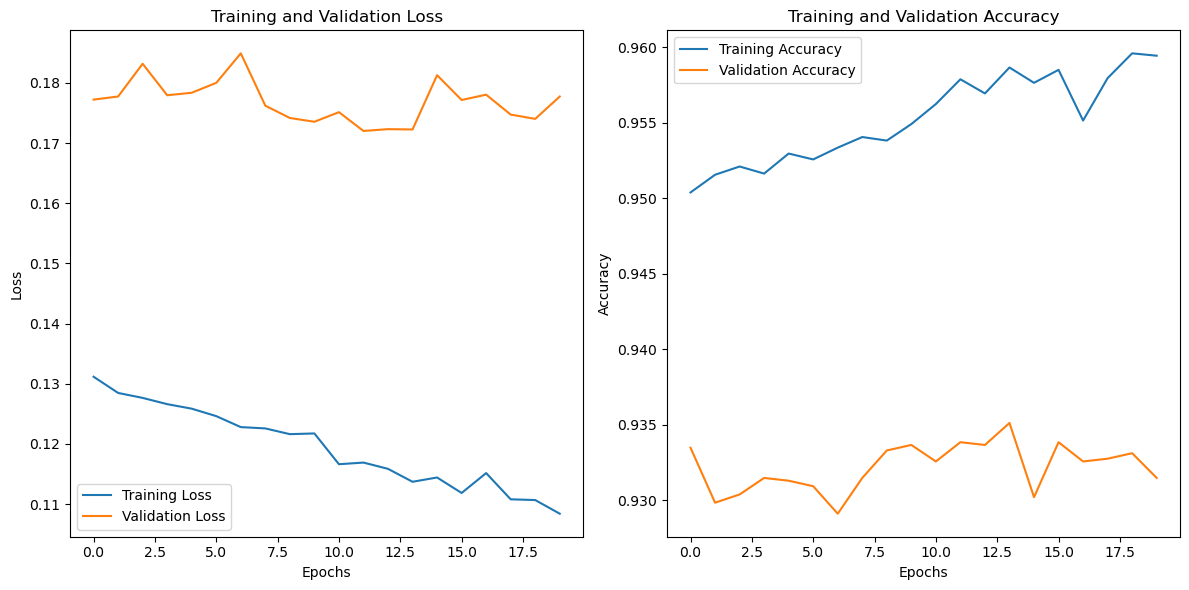

In [88]:
plot_training_curves(history)

In [90]:
predict_and_evaluate(X_test, y_test, model)

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.931461903025884
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3107
           1       0.94      0.90      0.92      2379

    accuracy                           0.93      5486
   macro avg       0.93      0.93      0.93      5486
weighted avg       0.93      0.93      0.93      5486

Confusion Matrix:
[[2973  134]
 [ 242 2137]]


#### Add dropout layers to the model


In [95]:
from tensorflow.keras.layers import Dropout

# Define the model
model2 = Sequential()

# LSTM layer with 100 units
model2.add(LSTM(100, input_shape=(None, 100)))

model2.add(Dropout(0.2))

# Output layer with a single neuron and sigmoid activation (for binary classification)
model2.add(Dense(1, activation='sigmoid'))

# Compiling the model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Printing the model summary
print(model2.summary())

c:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,501 (314.46 KB)

 Trainable params: 80,501 (314.46 KB)

 Non-trainable params: 0 (0.00 B)

None


In [96]:
### Finally Training
history2= model2.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=64)

Epoch 1/20


200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7866 - loss: 0.4733 - val_accuracy: 0.8868 - val_loss: 0.2739
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8942 - loss: 0.2648 - val_accuracy: 0.9012 - val_loss: 0.2516
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8971 - loss: 0.2513 - val_accuracy: 0.9061 - val_loss: 0.2409
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9020 - loss: 0.2403 - val_accuracy: 0.9001 - val_loss: 0.2434
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9058 - loss: 0.2328 - val_accuracy: 0.9110 - val_loss: 0.2296
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9103 - loss: 0.2251 - val_accuracy: 0.9143 - val_loss: 0.2220
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9083 - loss: 0.2277 - val_accuracy: 0.9149 - val_loss: 0.2177
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9151 - loss: 0.2125 - val_accuracy: 0.9105 - val_

In [97]:
predict_and_evaluate(X_test, y_test, model2)

172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.9230769230769231
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      3107
           1       0.93      0.89      0.91      2379

    accuracy                           0.92      5486
   macro avg       0.92      0.92      0.92      5486
weighted avg       0.92      0.92      0.92      5486

Confusion Matrix:
[[2945  162]
 [ 260 2119]]


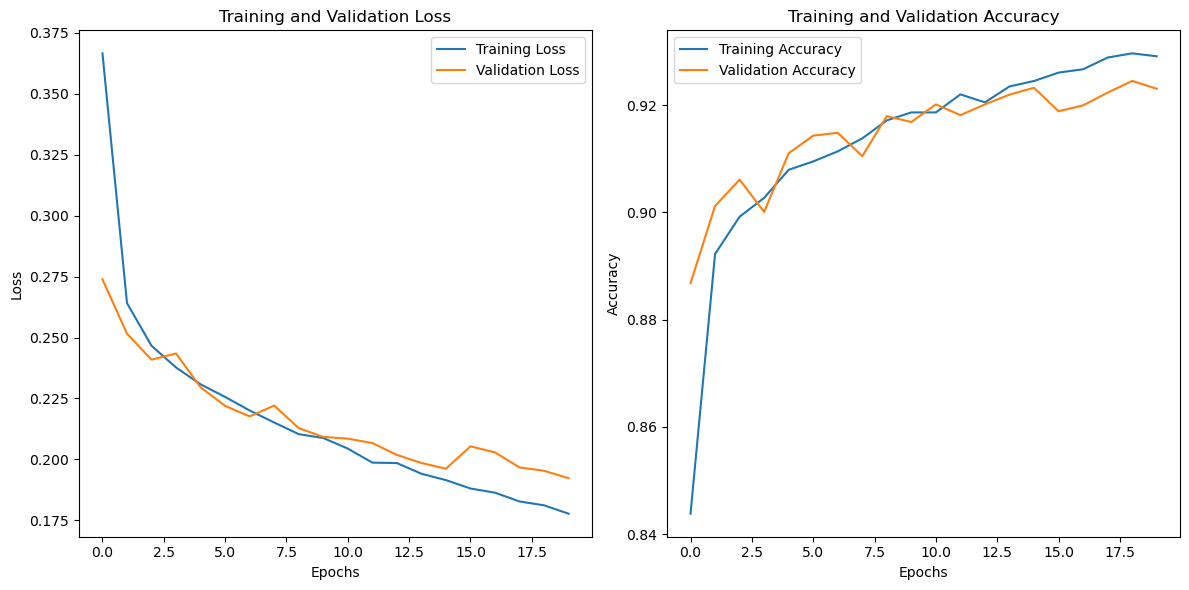

In [98]:
plot_training_curves(history2)

### Bidiraectional LSTM

In [100]:


from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Bidirectional

# Define the model
model3 = Sequential()

# LSTM layer with 100 units
model3.add(Bidirectional(LSTM(100, input_shape=(None, 100))))

model3.add(Dropout(0.2))

# Output layer with a single neuron and sigmoid activation (for binary classification)
model3.add(Dense(1, activation='sigmoid'))

# Compiling the model
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Printing the model summary
print(model3.summary())

c:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [113]:
### Finally Training
history3= model3.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=64)

Epoch 1/20


200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9742 - loss: 0.0727 - val_accuracy: 0.9360 - val_loss: 0.1838
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9714 - loss: 0.0738 - val_accuracy: 0.9353 - val_loss: 0.1836
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9713 - loss: 0.0765 - val_accuracy: 0.9358 - val_loss: 0.1872
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9716 - loss: 0.0766 - val_accuracy: 0.9338 - val_loss: 0.1907
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9749 - loss: 0.0685 - val_accuracy: 0.9326 - val_loss: 0.1869
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9737 - loss: 0.0715 - val_accuracy: 0.9335 - val_loss: 0.1951
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9732 - loss: 0.0711 - val_accuracy: 0.9327 - val_loss: 0.1906
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9713 - loss: 0.0750 - val_accuracy: 0.9333 - val_

In [114]:
predict_and_evaluate(X_test, y_test, model3)

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.9352898286547575
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      3107
           1       0.93      0.92      0.93      2379

    accuracy                           0.94      5486
   macro avg       0.93      0.93      0.93      5486
weighted avg       0.94      0.94      0.94      5486

Confusion Matrix:
[[2938  169]
 [ 186 2193]]


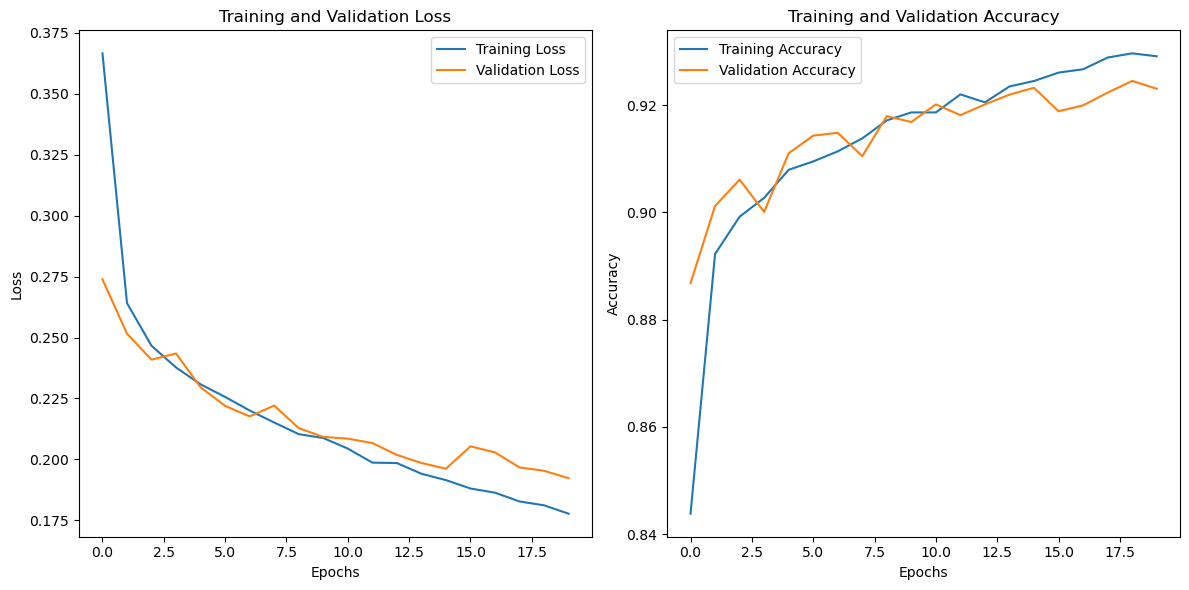

In [115]:
plot_training_curves(history2)

### Hyperparameter tuning

In [116]:
! pip install keras-tuner


  Using cached keras_tuner-1.4.7-py3-none-any.whl.metadata (5.4 kB)
  Using cached kt_legacy-1.0.5-py3-none-any.whl.metadata (221 bytes)
Using cached keras_tuner-1.4.7-py3-none-any.whl (129 kB)
Using cached kt_legacy-1.0.5-py3-none-any.whl (9.6 kB)



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [117]:
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt

# Define the model building function for Keras Tuner
def build_model(hp):
    model = Sequential()
    
    # Add LSTM layer with tunable number of units
    model.add(LSTM(
        units=hp.Int('units', min_value=50, max_value=200, step=50),
        input_shape=(X_train.shape[1], X_train.shape[2]),
        return_sequences=False
    ))
    
    # Add Dense layer with a tunable number of units
    model.add(Dense(
        units=hp.Int('dense_units', min_value=16, max_value=64, step=16),
        activation='relu'
    ))
    
    # Output layer
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile the model
    model.compile(
        optimizer=Adam(
            hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
        ),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Initialize Keras Tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=20,
    factor=3,
    directory='my_dir',
    project_name='helloworld'
)

# Search for the best hyperparameters
tuner.search(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Get the best model and hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best Hyperparameters:")
print(best_hyperparameters.values)

# Evaluate the best model
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

c:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
150               |150               |units
32                |32                |dense_units
0.00011617        |0.00011617        |learning_rate
3                 |3                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
0                 |0                 |tuner/round




### Get original test dataset